# **Рекомендация фильмов по текстовому описанию**



Стремительный рост сбора данных привел к наступлению новой эры информации. Данные используются для создания более эффективных систем, и именно здесь в игру вступают рекомендательные системы.  Рекомендательные системы являются разновидностью **систем фильтрации информации**, поскольку они улучшают качество результатов поиска и предоставляют элементы, которые более релевантны поисковому запросу или связаны с историей поиска пользователя.  

Они используются для предсказания **рейтинга** или **предпочтения**, которые пользователь отдаст тому или иному предмету. Почти каждая крупная технологическая компания применяет их в той или иной форме: Amazon использует их для предложения товаров покупателям, YouTube - для принятия решения о том, какое видео будет воспроизводиться следующим в режиме автовоспроизведения, а Facebook - для рекомендации страниц, которые стоит лайкнуть, и людей, за которыми стоит следить.
Более того, такие компании, как Netflix и Spotify, в значительной степени зависят от эффективности своих рекомендательных движков для ведения бизнеса и получения прибыли.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

В целом существует три типа рекомендательных систем:



> * **Демографическая фильтрация** - Она предлагает обобщенные рекомендации каждому пользователю, основанные на популярности фильма и/или его жанре. Система рекомендует одни и те же фильмы пользователям с похожими демографическими характеристиками. Поскольку каждый пользователь индивидуален, такой подход можно считать слишком простым. Основная идея этой системы заключается в том, что фильмы, которые пользуются большей популярностью и признанием критиков, с большей вероятностью понравятся среднестатистическому зрителю.


![](https://i.imgur.com/rV4hfnH.jpeg)





> * **Фильтрация на основе контента** - Она предлагает схожие товары. Для создания таких рекомендаций система использует метаданные объекта, такие как жанр, режиссер, описание, актеры и т. д. для фильмов. Общая идея этих рекомендательных систем заключается в том, что если человеку понравился определенный товар, то ему также понравится и похожий на него товар.

### Amazon
![](https://i.imgur.com/Qg5qBgl.png)










### Netflix

![](https://i.imgur.com/Ugkbtfi.png)

> * **Коллаборативная фильтрация** - Эта система сопоставляет людей со схожими интересами и предоставляет рекомендации на основе этого сопоставления. Коллаборативные фильтры не требуют метаданных элементов, как их аналоги, основанные на контенте.

### Amazon
![](https://i.imgur.com/N3hoabm.png)

Давайте теперь загрузим данные.

In [2]:
import pandas as pd
import numpy as np
movies = pd.read_csv('./tmdb_5000_movies.csv')


Датасет содержит следующие характеристики:
* budget - бюджет, на который был снят фильм.
* genre - Жанр фильма, боевик, комедия, триллер и т.д.
* homepage - Ссылка на домашнюю страницу фильма.
* id - Фактически это идентификатор фильма.
* keywords - Ключевые слова или теги, связанные с фильмом.
* original_language - Язык, на котором был снят фильм.
* original_title - Название фильма до перевода или адаптации.
* overview - Краткое описание фильма.
* popularity - Числовое значение, указывающее на популярность фильма.
* production_companies - Производственная компания фильма.
* production_countries - Страна, в которой был снят фильм.
* release_date - Дата выхода фильма в прокат.
* revenue - Мировой доход, полученный фильмом.
* runtime - Время работы фильма в минутах.
* status - "Released" или "Rumored".
* tagline - Заголовок фильма.
* title - Название фильма.
* vote_average - средний рейтинг, полученный фильмом.
* vote_count - количество набранных голосов.



Посмотрим на сами данные

In [7]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# **Демографическая фильтрация** -
   Прежде чем приступить к работе с этим -
* Нам нужно получить метрику для оценки фильма.
* Рассчитать оценку для каждого фильма
* Отсортировать оценки и рекомендовать пользователям фильмы с наилучшим рейтингом.

Мы можем использовать средний рейтинг фильма в качестве оценки, но это будет не совсем корректно, так как фильм со средним рейтингом 8,9 и всего 3 голосами не может считаться лучшим, чем фильм со средним рейтингом 7,8, но 40 голосами.
Поэтому в качестве оценки мы будем использовать взвешенный рейтинг IMDB (wr), который выглядит следующим образом :-

![](https://image.ibb.co/jYWZp9/wr.png)
где,
* v - количество голосов, отданных за фильм;
* m - минимальное количество голосов, необходимое для попадания в таблицу;
* R - средний рейтинг фильма; и
* C - средний голос по всему отчету.У нас уже есть v(**vote_count**) и R (**vote_average**), а C можно рассчитать как

In [15]:
C= movies['vote_average'].mean()
C

6.092171559442016

Итак, средняя оценка всех фильмов составляет около 6 по 10-балльной шкале. Следующий шаг - определение подходящего значения m, минимального количества голосов, необходимого для включения в таблицу. Мы будем использовать 90-й процентиль в качестве отсечки. Другими словами, чтобы фильм попал в чарт, он должен набрать больше голосов, чем хотя бы 90 % фильмов в списке.

In [16]:
m= movies['vote_count'].quantile(0.9)
m

1838.4000000000015

Теперь мы можем отфильтровать фильмы, которые попадают в таблицу

In [17]:
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(481, 20)

Мы видим, что в этом списке 481 фильм. Теперь нам нужно рассчитать нашу метрику для каждого фильма, отвечающего требованиям. Для этого мы определим функцию **weighted_rating()** и определим новую функцию **score**, значение которой мы вычислим, применив эту функцию к нашему DataFrame квалифицированных фильмов:

In [19]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Расчет по формуле IMDB
    return (v/(v+m) * R) + (m/(m+v) * C)

In [20]:
# Определим новую функцию 'score' и рассчитаем ее значение с помощью `weighted_rating()`.
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Наконец, отсортируем DataFrame по признаку оценки и выведем название, количество голосов, среднее количество голосов и взвешенный рейтинг или оценку 10 лучших фильмов.

In [21]:
#Сортировка фильмов на основе рейтинга, рассчитанного выше
q_movies = q_movies.sort_values('score', ascending=False)

#Вывод 15 лучших фильмов
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Популярные фильмы')

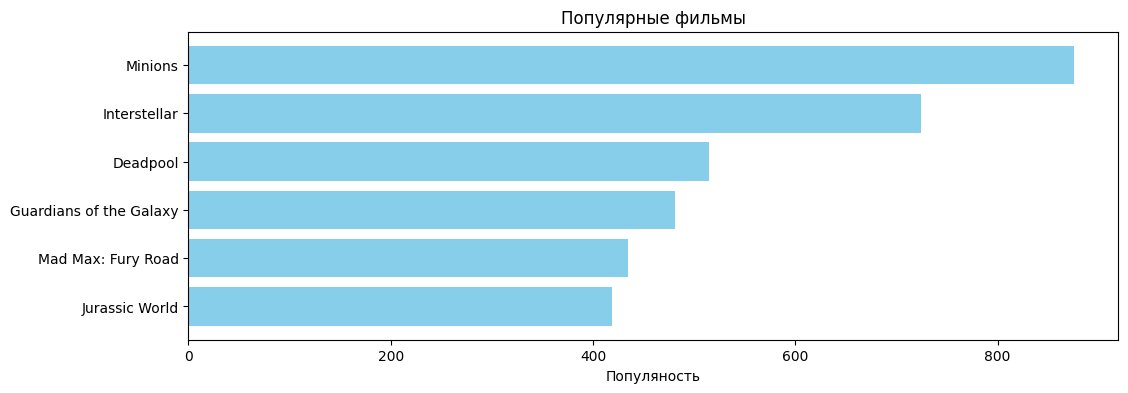

In [22]:
pop= movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Популяность")
plt.title("Популярные фильмы")


Следует иметь в виду, что эти демографические рекомендательные системы предоставляют общую таблицу рекомендуемых фильмов для всех пользователей. Они не учитывают интересы и вкусы конкретного пользователя.

* **Фильтрация на основе содержания**.
В этой рекомендательной системе содержимое фильма (обзор, актерский состав, команда, ключевые слова, теглайн и т. д.) используется для поиска его сходства с другими фильмами. Затем рекомендуются фильмы, которые с наибольшей вероятностью похожи.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Рекомендации на основе описания сюжета**

Мы рассчитаем попарные оценки сходства для всех фильмов на основе описания их сюжета и будем рекомендовать фильмы на основе этих оценок сходства. Описание сюжета приведено в **overview** фиче нашего набора данных.
Давайте посмотрим на данные.

In [8]:
movies['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Теперь мы вычислим векторы Term Frequency-Inverse Document Frequency (TF-IDF) для каждого обзора.

Если вы задаетесь вопросом, что такое частота термина, то это относительная частота слова в документе, которая задается как
   **(количество экземпляров термина/общее количество экземпляров)**.
Обратная частота документа - это относительное количество документов, содержащих термин, которое задается как
**log(количество документов/документы с термином)**.
Общая важность каждого слова для документов, в которых оно встречается, равна **TF * IDF**.

В результате вы получите матрицу, в которой каждый столбец представляет слово из словаря обзора (все слова, которые встречаются хотя бы в одном документе), а каждая строка - фильм, как и раньше. Это делается для того, чтобы уменьшить важность слов, которые часто встречаются в обзорах сюжетов, и, следовательно, их значимость при вычислении итогового балла сходства.

К счастью, scikit-learn предоставляет вам встроенный класс TfIdfVectorizer, который создает матрицу TF-IDF за пару строк.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Определим объект векторизатора TF-IDF. Удалим все английские стоп-слова, такие как 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Заменим NaN пустой строкой
movies['overview'] = movies['overview'].fillna('')

#Построим требуемую матрицу TF-IDF путем подгонки и преобразования данных
tfidf_matrix = tfidf.fit_transform(movies['overview'])

tfidf_matrix.shape

(4803, 20978)

Мы видим, что для описания 4800 фильмов в нашем наборе данных было использовано более 20 000 различных слов.

Теперь, имея на руках эту матрицу, мы можем вычислить оценку сходства. Для этого можно использовать различные метрики, такие как Евклидова, Пирсона или [косинусная метрика] (https://en.wikipedia.org/wiki/Cosine_similarity). Разные метрики хорошо работают в разных сценариях, и часто бывает полезно поэкспериментировать.

Мы будем использовать косинусоидальное сходство между двумя фильмами. Мы используем косинусоидальную метрику, поскольку оно не зависит от амплитуды и относительно легко и быстро вычисляется. Математически он определяется следующим образом:
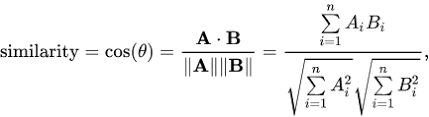

Поскольку мы использовали векторизатор TF-IDF, вычисление точечного произведения напрямую даст нам оценку косинусного сходства. Поэтому мы будем использовать **linear_kernel()** от sklearn вместо cosine_similarities(), так как это быстрее.

In [4]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [5]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


In [6]:
def get_recommendations(title, cosine_sim=cosine_sim, scores=cosine_sim):
    # Получение индекса фильма, соответствующего названию
    idx = indices[title]

    # Получение оценок парного сходства всех фильмов с этим фильмом
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Сортировка фильмов по степени сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #  10 самых похожих фильмов
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [26]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

# LaBSE

In [12]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load pre-trained LaBSE model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/LaBSE")
model = AutoModel.from_pretrained("sentence-transformers/LaBSE").to(device)



Using device: cuda


In [16]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def get_labse_vectors_batch(texts, model, tokenizer, device, batch_size=32):
    embeddings = []

    num_batches = (len(texts) + batch_size - 1) // batch_size

    for i in tqdm(range(0, len(texts), batch_size), total=num_batches, desc="Generating LaBSE vectors"):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)

    return np.vstack(embeddings)


movies['overview'] = movies['overview'].fillna('')

overviews = movies['overview'].tolist()

labse_vectors = get_labse_vectors_batch(overviews, model, tokenizer, device)


labse_vectors.shape



Generating LaBSE vectors: 100%|██████████| 151/151 [00:42<00:00,  3.51it/s]
<ipython-input-16-6fcb914f0b99>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies[f'labse_vector_{i}'] = labse_vectors[:, i]
<ipython-input-16-6fcb914f0b99>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies[f'labse_vector_{i}'] = labse_vectors[:, i]
<ipython-input-16-6fcb914f0b99>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

Shape of LaBSE vectors: (4803, 768)


<ipython-input-16-6fcb914f0b99>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies[f'labse_vector_{i}'] = labse_vectors[:, i]
<ipython-input-16-6fcb914f0b99>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies[f'labse_vector_{i}'] = labse_vectors[:, i]
<ipython-input-16-6fcb914f0b99>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [17]:
labse_vectors.shape

(4803, 768)

In [18]:
from sklearn.metrics.pairwise import linear_kernel

labse_cosine_sim = linear_kernel(labse_vectors, labse_vectors)

indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [19]:
get_recommendations('The Dark Knight Rises', labse_cosine_sim)

1253                     Kiss of Death
65                     The Dark Knight
1422    The X Files: I Want to Believe
600                       Killer Elite
1209                     The Rainmaker
982                      Run All Night
1830                        Ride Along
987                        Dream House
3805                    Purple Violets
210                     Batman & Robin
Name: title, dtype: object

# Fasttext

In [20]:
from gensim.models import FastText
import gensim.downloader as api
import numpy as np



model = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [23]:
def get_weighted_fasttext_vectors_batch(texts, model, tfidf_vectorizer, tfidf_matrix, batch_size=1000):
    embeddings = []

    num_batches = (len(texts) + batch_size - 1) // batch_size

    for i in tqdm(range(0, len(texts), batch_size), total=num_batches, desc="Generating weighted FastText vectors"):
        batch = texts[i:i+batch_size]
        batch_embeddings = []

        for j, text in enumerate(batch):
            words = text.split()
            word_vectors = []
            weights = []

            for word in words:
                if word in model and word in tfidf_vectorizer.vocabulary_:
                    word_vectors.append(model[word])
                    tfidf_index = tfidf_vectorizer.vocabulary_[word]
                    weight = tfidf_matrix[i+j, tfidf_index]
                    weights.append(weight)

            if word_vectors:
                weighted_vectors = np.array(word_vectors) * np.array(weights)[:, np.newaxis]
                avg_vector = np.sum(weighted_vectors, axis=0) / np.sum(weights)
            else:
                avg_vector = np.zeros(model.vector_size)

            batch_embeddings.append(avg_vector)

        embeddings.extend(batch_embeddings)

    return np.array(embeddings)


movies['overview'] = movies['overview'].fillna('')

overviews = movies['overview'].tolist()

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(overviews)

fasttext_vectors = get_weighted_fasttext_vectors_batch(overviews, model, tfidf_vectorizer, tfidf_matrix)


fasttext_vectors.shape

Creating TF-IDF vectorizer...


Generating weighted FastText vectors: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


(4803, 300)

In [24]:
from sklearn.metrics.pairwise import linear_kernel

fasttext_cosine_sim = linear_kernel(fasttext_vectors, fasttext_vectors)

indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [25]:
get_recommendations('The Dark Knight Rises', fasttext_cosine_sim)

2435                               Running Scared
2910                       A Tale of Three Cities
4367    The Broken Hearts Club: A Romantic Comedy
176                                  The Revenant
3475                             Casa De Mi Padre
3374                                   Veer-Zaara
2807                             The Perfect Game
935                           Herbie Fully Loaded
2850           Tales from the Crypt: Demon Knight
1293                                Frankenweenie
Name: title, dtype: object

Несмотря на то, что наша система неплохо справляется с поиском фильмов с похожим сюжетом, качество рекомендаций оставляет желать лучшего. "Тёмный рыцарь: Возрождение *легенды*" возвращает все фильмы о Бэтмене, в то время как люди, которым понравился этот фильм, скорее всего, больше склонны любить другие фильмы Кристофера Нолана. Это то, что не может уловить текущая система.